<a href="https://colab.research.google.com/github/KGF2/DeepLearningAmateur/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q sklearn

In [0]:
%tensorflow_version 2.x

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np # for array manupulation
import pandas as pd # for data analalitics
import matplotlib.pyplot as plt # for plotting 
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc # for linear regression

import tensorflow as tf


In [0]:
# loading dataset

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data (returns new dataframe)
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain)
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

     survived     sex   age  ...     deck  embark_town  alone
0           0    male  22.0  ...  unknown  Southampton      n
1           1  female  38.0  ...        C    Cherbourg      n
2           1  female  26.0  ...  unknown  Southampton      y
3           1  female  35.0  ...        C  Southampton      n
4           0    male  28.0  ...  unknown   Queenstown      y
..        ...     ...   ...  ...      ...          ...    ...
622         0    male  28.0  ...  unknown  Southampton      y
623         0    male  25.0  ...  unknown  Southampton      y
624         1  female  19.0  ...        B  Southampton      y
625         0  female  28.0  ...  unknown  Southampton      n
626         0    male  32.0  ...  unknown   Queenstown      y

[627 rows x 10 columns]


In [0]:
y_train.head()
print(dftrain)

        sex   age  n_siblings_spouses  ...     deck  embark_town alone
0      male  22.0                   1  ...  unknown  Southampton     n
1    female  38.0                   1  ...        C    Cherbourg     n
2    female  26.0                   0  ...  unknown  Southampton     y
3    female  35.0                   1  ...        C  Southampton     n
4      male  28.0                   0  ...  unknown   Queenstown     y
..      ...   ...                 ...  ...      ...          ...   ...
622    male  28.0                   0  ...  unknown  Southampton     y
623    male  25.0                   0  ...  unknown  Southampton     y
624  female  19.0                   0  ...        B  Southampton     y
625  female  28.0                   1  ...  unknown  Southampton     n
626    male  32.0                   0  ...  unknown   Queenstown     y

[627 rows x 9 columns]


In [0]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [0]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
dftrain.shape

(627, 9)

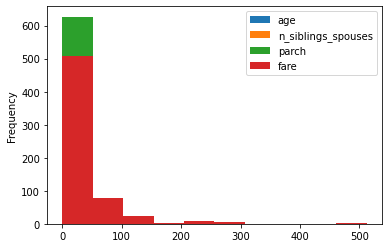

In [0]:
dftrain.plot.hist(by='age', bins=10)